In [1]:
from src.data.make_dataset import generate_dataset
from src.models.train_model import GridGP

import matplotlib.pyplot as plt
from pathlib import Path

import numpy as np

# Generate dataset based on face

details of things that are happening

c:\users\roberttk\desktop\slac_ra\machine-learning\ls_be\src\data\make_dataset.py:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xanes == 'trig':


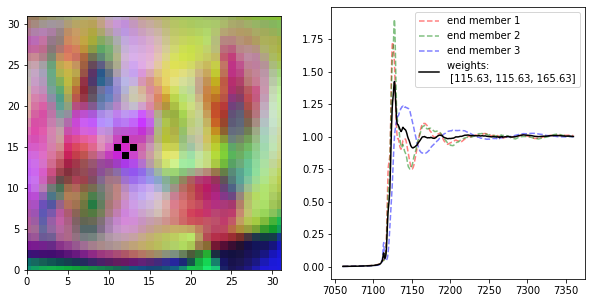

In [3]:
face_image, xanes_data, xanes_energy, xanes_cpts = generate_dataset(n_cpts=3, seed=42, 
                                supply_truth=True, xanes='xanes')
x=12
y=15

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].imshow(face_image[:, :, :3]/face_image.max()) # Plots in RGB
axes[0].scatter([x, x, x-1, x+1], [y+1, y-1, y, y], marker='s', c='k')
axes[0].set_ylim(0,31)
axes[0].set_xlim(0,31)
# outline around x, y point
axes[1].plot(xanes_energy, xanes_cpts[0], 'r--', label='end member 1', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[1], 'g--', label='end member 2', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[2], 'b--', label='end member 3', alpha=0.5)
# axes[1].plot(xanes_energy, xanes_cpts[3], 'm--', label='end member 4', alpha=0.5)
# axes[1].plot(xanes_energy, xanes_cpts[4], 'c--', label='end member 5', alpha=0.5)



axes[1].plot(xanes_energy, xanes_data[x*32 + y], 'k', label=f'weights: \n {[round(k,2) for k in face_image[x, y,:]]}')
axes[1].legend()#loc='upper left', bbox_to_anchor=(1.05, 1))

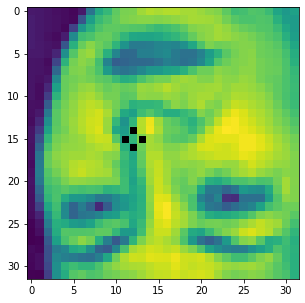

In [9]:
face_path = Path.cwd().parent / 'reports' / 'figures'
fig = plt.figure(figsize=(5, 5))

plt.imshow(face_image[:, :,0]/face_image.max()) # Plots in RGB
plt.scatter([x, x, x-1, x+1], [y+1, y-1, y, y], marker='s', c='k')
# plt.savefig(face_path / 'face3.png')

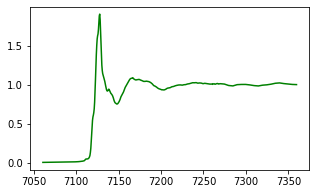

In [27]:
face_path = Path.cwd().parent / 'reports' / 'figures'
plt.figure(figsize=(5,3))
plt.plot(xanes_energy, xanes_cpts[1], 'g', label='end member 1')
plt.savefig(face_path / 'xanes2.png')

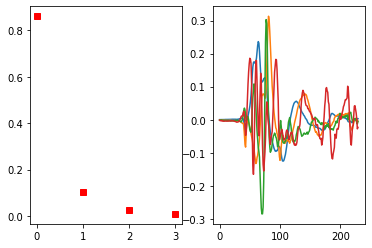

In [10]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=4)
subset_cpts = pca_model.fit_transform(xanes_data)

plt.close()
fix, axes = plt.subplots(1,2)
axes[0].plot(pca_model.explained_variance_ratio_, 'rs')
axes[1].plot(pca_model.components_.T)

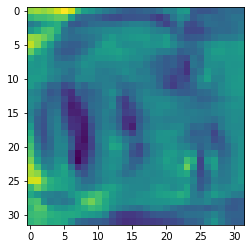

In [15]:
plt.imshow(subset_cpts[:,0].reshape(32,32))

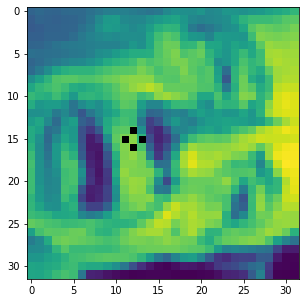

In [21]:
face_path = Path.cwd().parent / 'reports' / 'figures'
fig = plt.figure(figsize=(5, 5))

plt.imshow(face_image[:, :,4]/face_image.max()) # Plots in RGB
plt.scatter([x, x, x-1, x+1], [y+1, y-1, y, y], marker='s', c='k')
# plt.savefig(face_path / 'face3.png')

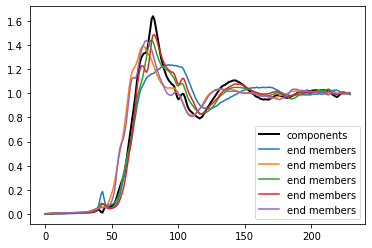

In [19]:
plt.plot(pca_model.mean_.T+pca_model.components_.T[:, 1], 'k', linewidth=2, label='components')
plt.plot( xanes_cpts.T, label='end members')
plt.legend()

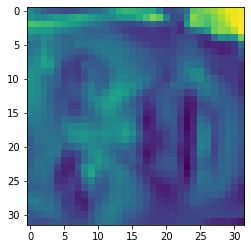

In [14]:
plt.imshow(subset_cpts[:,0].reshape(32,32))

In [5]:
from src.models.train_model import BO_loop, grid_search, dist_loop
from src.models.acquisition import Random, MaxVariance

=== iter 0, ((4, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 1, ((5, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 2, ((6, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 3, ((7, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 4, ((8, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 5, ((9, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 6, ((10, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 7, ((11, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 8, ((12, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 9, ((13, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 10, ((14, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 11, ((15, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 12, ((16, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 13, ((17, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 14, ((18, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 15, ((19, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 16, ((20, 4)) -- cpt 0 -- cpt 1

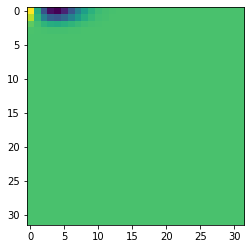

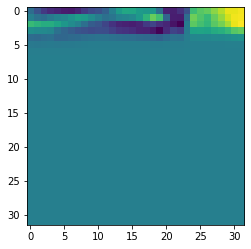

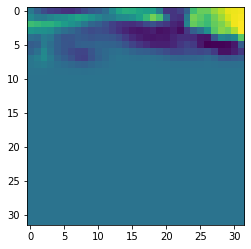

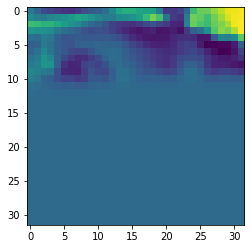

In [5]:
grid_gps, grid_variances, grid_errors, grid_info_dict = grid_search(xanes_data, n_iters=400, n_cpts=4)

=== iter 0, ((10, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 1, ((11, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 2, ((12, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 3, ((13, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 4, ((14, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 5, ((15, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 6, ((16, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 7, ((17, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 8, ((18, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 9, ((19, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 10, ((20, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 11, ((21, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 12, ((22, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 13, ((23, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 14, ((24, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 15, ((25, 4)) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 16, ((26, 4)) -- cpt 0 --

KeyboardInterrupt: 

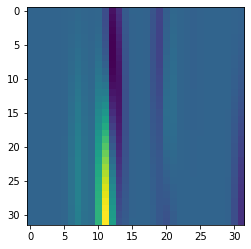

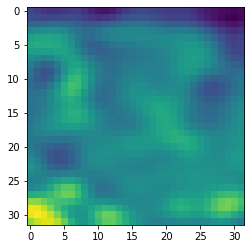

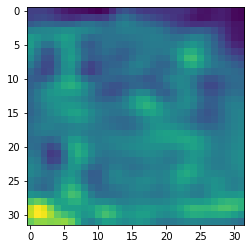

In [6]:
bo_gps, bo_variances, bo_errors, bo_info_dict = BO_loop(xanes_data, n_cpts=4, n_iters=400, acq_func=MaxVariance)

=== iter 0, shifted 0x
([31 31]-->[26 13] = [28 22]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 1, shifted 0x
([30 11]-->[26 20] = [28 16]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 2, shifted 0x
([16 13]-->[24 20] = [20 16]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 3, shifted 0x
([16 13]-->[20 16] = [18 14]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 4, shifted 0x
([18 14]-->[20 16] = [19 15]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 5, shifted 1x
([20 16]-->[16 13] = [19 14]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 6, shifted 0x
([25  7]-->[19 14] = [22 10]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 7, shifted 0x
([22 10]-->[25  7] = [24  8]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 8, shifted 0x
([19 14]-->[20 16] = [20 15]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 9, shifted 1x
([20 16]-->[19 14] = [21 15]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3  
=== iter 10, shifted 1x
([24  8]-->[25  7] = [25  8]) -- cpt 0 -- cpt 1 -- cpt 2 -- cpt 3 

ValueError: too many values to unpack (expected 3)

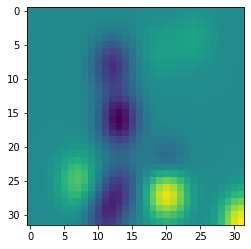

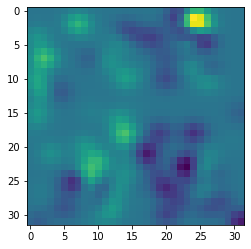

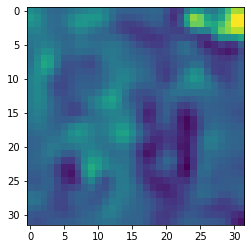

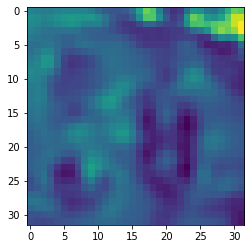

In [5]:
dist_variances, dist_errors, dist_info_dict = dist_loop(xanes_data, n_cpts=4, n_iters=400)

Iter 10/2000: 0.1664489060640335
Iter 20/2000: -0.45706677436828613
Iter 30/2000: -0.509061336517334
Iter 40/2000: -0.6324370503425598
Iter 50/2000: -0.6683980822563171
Iter 60/2000: -0.6759232878684998


(<Figure size 504x504 with 4 Axes>,
 array([[<AxesSubplot:xlabel='iter', ylabel='max variance'>,
         <AxesSubplot:xlabel='iter', ylabel='Mean squared error'>],
        [<AxesSubplot:title={'center':'ground truth'}>,
         <AxesSubplot:title={'center':'mean'}>]], dtype=object))

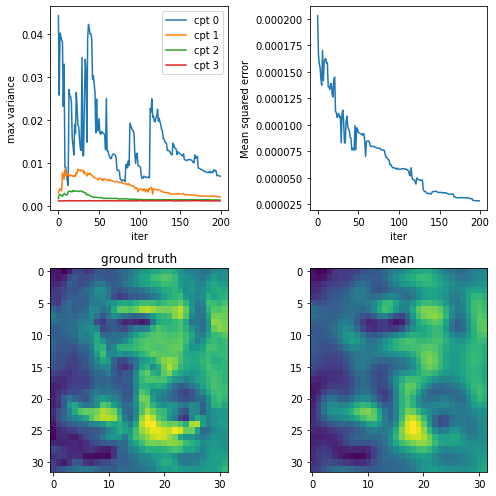

In [7]:
from src.visualization.visualize import plot_component_comp
import torch

plot_component_comp(xanes_data, bo_info_dict['curr_cpt_weights'], 
                torch.Tensor(bo_info_dict['train_x']), bo_info_dict['test_x'], bo_variances, bo_errors['spec_mse_avg'])

Iter 10/2000: -0.1478814333677292
Iter 20/2000: -0.48074987530708313
Iter 30/2000: -0.668022871017456
Iter 40/2000: -0.723011314868927
Iter 50/2000: -0.746773362159729
Iter 60/2000: -0.7588899731636047
Iter 70/2000: -0.7631222009658813


(<Figure size 504x504 with 4 Axes>,
 array([[<AxesSubplot:xlabel='iter', ylabel='max variance'>,
         <AxesSubplot:xlabel='iter', ylabel='Mean squared error'>],
        [<AxesSubplot:title={'center':'ground truth'}>,
         <AxesSubplot:title={'center':'mean'}>]], dtype=object))

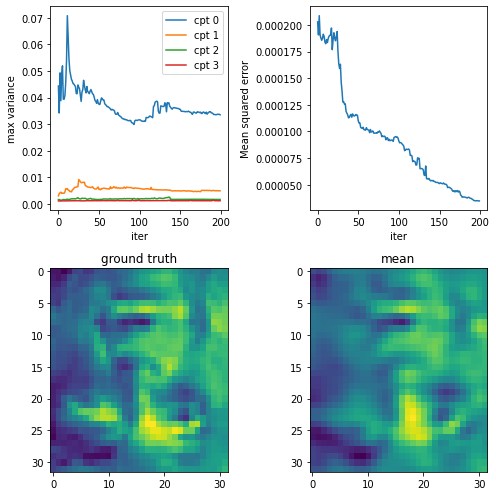

In [11]:
plot_component_comp(xanes_data, dist_info_dict['curr_cpt_weights'], 
                torch.Tensor(dist_info_dict['train_x']), dist_info_dict['test_x'], dist_variances, dist_errors['spec_mse_avg'])

Iter 10/2000: -1.088196873664856
Iter 20/2000: -1.4854553937911987
Iter 30/2000: -1.5164436101913452
Iter 40/2000: -1.5418665409088135
Iter 50/2000: -1.574477195739746
Iter 60/2000: -1.5884276628494263
Iter 70/2000: -1.5986340045928955
Iter 80/2000: -1.607666015625
Iter 90/2000: -1.6129539012908936
Iter 100/2000: -1.6163198947906494
Iter 110/2000: -1.618067979812622


(<Figure size 504x504 with 4 Axes>,
 array([[<AxesSubplot:xlabel='iter', ylabel='max variance'>,
         <AxesSubplot:xlabel='iter', ylabel='Mean squared error'>],
        [<AxesSubplot:title={'center':'ground truth'}>,
         <AxesSubplot:title={'center':'mean'}>]], dtype=object))

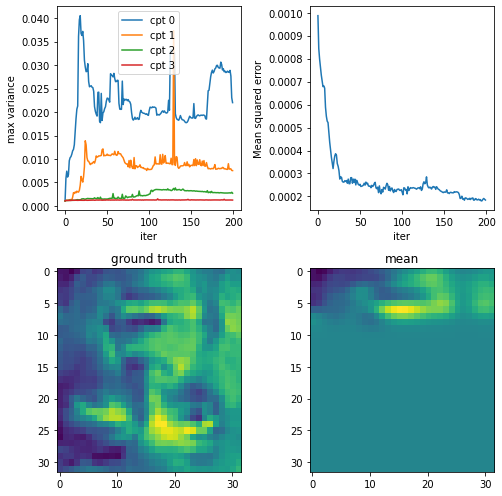

In [9]:
from src.visualization.visualize import plot_component_comp

plot_component_comp(xanes_data, -grid_info_dict['curr_cpt_weights'], 
                grid_info_dict['train_x'], grid_info_dict['test_x'], grid_variances, grid_errors['spec_mse_avg'])

Text(0.5, 0, 'iter')

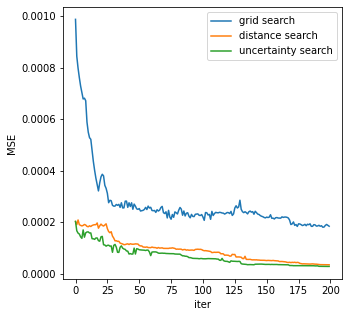

In [21]:
plt.figure(figsize=(5,5))
plt.plot(grid_errors['spec_mse_avg'], label='grid search')
plt.plot(dist_errors['spec_mse_avg'], label='distance search')
plt.plot(bo_errors['spec_mse_avg'], label='uncertainty search')
plt.legend()
plt.ylabel('MSE')
plt.xlabel('iter')

# scratch

In [ ]:
def ret_angle(loc1, loc2):
    loc = loc1 - loc2
    if np.linalg.norm(loc) ==0:
        return 0
    return np.arccos( np.dot(loc, np.array([0,1])) / np.linalg.norm(loc) )

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import NearestNeighbors
from src.models.train_model import initialize_model
from botorch.optim.fit import fit_gpytorch_torch
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import gpytorch

n_iters=30
n_init=10
n_cpts=3
seed=10
dist_metric=cosine_distances
show_iter_output=True
optim_options={'maxiter':2000, 'lr':0.1, 'disp':False}

# initialize storage
dist_matrix = np.zeros((xanes_data.shape[0], xanes_data.shape[0]))

# initialize training points
rng = np.random.default_rng(seed=seed)
init_inds = rng.choice(xanes_data.shape[0], size=(n_init), replace=False)

all_pca_model = PCA(n_components=n_cpts)
all_cpts = all_pca_model.fit_transform(xanes_data)

pca_model = PCA(n_components=n_cpts)
cpts_subset = pca_model.fit_transform(xanes_data[init_inds])

for i in init_inds:
    for j in init_inds:
        distance = dist_metric(xanes_data[i].reshape(1,-1), 
                                xanes_data[j].reshape(1,-1)).item()
        dist_matrix[i, j] = distance
        dist_matrix[j, i] = distance

# Look for nearest neighbors in real space... 
x, y = torch.meshgrid(torch.linspace(0,31,32), torch.linspace(0,31,32))
test_x = torch.vstack((x.flatten(), y.flatten())).T

tested_locs = np.unravel_index(init_inds, (32,32))
tested_locs = np.array([tested_locs[0], tested_locs[1]]).T
init_obs = torch.Tensor(tested_locs.copy())

variances = [[] for i in range(n_cpts)]
cand_pts  = []
errors = {'pca_mse':[], 'spec_mse_avg':[], 'spec_mse_std':[]}

for i in range(n_iters):
    if show_iter_output:
        print(f'=== iter {i},', end=' ')
    # each iteration of optimization, updating tested_locs
    neigh = NearestNeighbors(n_neighbors=3, radius=1024)
    neigh.fit(tested_locs)

    # init mask
    mask = np.zeros_like(dist_matrix) 
    # for each measured point, find nearest neighbors from measured points
    for loc in tested_locs:
        # from initialized 0 mask, set mask to 1 with row=from, col=to
        neigh_dist, neigh_inds = neigh.kneighbors([loc], 4)
        neigh_dist = neigh_dist[0]
        neigh_inds = neigh_inds[0]
        # sort out colinear nns
        nn_angs = np.nan_to_num([ret_angle(x, loc) for x in tested_locs[neigh_inds]], 0)
        to_remove = []
        for ang in nn_angs:
            if np.isnan(ang): # skips the self-comparison
                continue
            temp_angs = np.abs(nn_angs - ang)
            thresh = 0.1
            if np.sum(temp_angs < thresh) > 1: # if there are more than one at this similar angle
                # find max distance between similar angles
                max_dist_ind = np.argmax( (temp_angs<thresh) * neigh_dist )
                # remove further item from list
                to_remove.append(max_dist_ind)
                
        # delete items from nn list
        neigh_inds = np.delete(neigh_inds, to_remove)
        
        nn_inds = np.ravel_multi_index(tested_locs[neigh_inds].T, (32,32))
        loc_ind = np.ravel_multi_index(loc, (32,32))
        
        mask[loc_ind, nn_inds] = 1
        mask[loc_ind, loc_ind] = 0

    # mask distance matrix
    masked = mask * dist_matrix

    # find max distance, next point is between
    mins = np.where(masked==masked.max())
    from_loc = np.unravel_index(mins[0][0], (32,32))
    from_loc = np.array(from_loc).flatten()
    to_loc = np.unravel_index(mins[1][0], (32,32))
    to_loc = np.array(to_loc).flatten()

    next_loc = np.round(np.average([from_loc, to_loc], axis=0)).astype(int)
    its = 0
    
    shift_x = True
    while any([all(next_loc==x) for x in tested_locs]) and (its < 10):
        # if we're trying to re-measure a point, shift it?
        if shift_x:
            next_loc += np.array([1, 0]) 
            shift_x = not shift_x
        else: 
            next_loc += np.array([0, 1])
            shift_x = not shift_x
        
        next_loc = next_loc % 32

    print(f'({from_loc}-->{to_loc} = {next_loc})', end=' ')

    # collect error information
    ## generate reconstructions via pca_model
    gps = [initialize_model(torch.Tensor(tested_locs), torch.Tensor(cpts_subset[:, c])) for c in range(n_cpts)]
    means = [torch.ones(test_x.shape) for x in range(n_cpts)]
    if show_iter_output:
        print(' ')

    # add new point to list
    tested_locs = np.concatenate((tested_locs, next_loc.reshape(1,-1)), axis=0).astype(int)
    tested_inds = np.ravel_multi_index(tested_locs.T, (32,32))
    # update distance matrix
    for j in tested_inds:
        i = tested_inds[-1]
        distance = dist_metric(xanes_data[i].reshape(1, -1), 
                                xanes_data[j].reshape(1, -1)).item()
        dist_matrix[i, j] = distance
        dist_matrix[j, i] = distance

    # plot stuff?
    plt.figure(figsize=(5,5))
    from_nn_inds = mins[0][0]
    from_nns = neigh.kneighbors([from_loc], 4, return_distance=False)
    plt.scatter(tested_locs[:-1,0], tested_locs[:-1,1], s=100, marker='s', c='k')
    plt.scatter(tested_locs[from_nns][0,:,0], tested_locs[from_nns][0,:,1],c='r', s=100, marker='s')
    plt.scatter(from_loc[0], from_loc[1], c='y')
    plt.scatter(to_loc[0], to_loc[1], c='c')
    plt.scatter(next_loc[0], next_loc[1], c='r', marker='d', s=100)


In [ ]:
for loc in [np.array([31,31])]:
    # from initialized 0 mask, set mask to 1 with row=from, col=to
    neigh_dist, neigh_inds = neigh.kneighbors([loc], 4)
    neigh_dist = neigh_dist[0]
    neigh_inds = neigh_inds[0]
    # sort out colinear nns
    nn_angs = np.nan_to_num([ret_angle(x, loc) for x in tested_locs[neigh_inds]], 0)
    to_remove = []
    for ang in nn_angs:
        print(ang)
        if np.isnan(ang): # skips the self-comparison
            print('found nan')
            continue
        temp_angs = np.abs(nn_angs - ang)
        thresh = 0.1
        if np.sum(temp_angs < thresh) > 1: # if there are more than one at this similar angle
            print(f'found colinear: {nn_angs}')
            # find max distance between similar angles, masking off with threshold
            max_dist_ind = np.argmax( (temp_angs<thresh) * neigh_dist )
            # max_dist_ind = np.argmin(temp_dist)
            print(f'add to remove list: {max_dist_ind}')
            to_remove.append(max_dist_ind)
    # delete items from nn list
    neigh_inds = np.delete(neigh_inds, to_remove)
            
    nn_inds = np.ravel_multi_index(tested_locs[neigh_inds].T, (32,32))
    loc_ind = np.ravel_multi_index(loc, (32,32))
    
    mask[loc_ind, nn_inds] = 1
    mask[loc_ind, loc_ind] = 0

In [ ]:
plt.scatter(tested_locs[:,0], tested_locs[:,1], s=100, marker='s', c='k')
plt.scatter(tested_locs[neigh_inds][:,0], tested_locs[neigh_inds][:,1],c='r', s=100, marker='s')
# plt.scatter(from_loc[0], from_loc[1], c='y')
# plt.scatter(to_loc[0], to_loc[1], c='c')

NameError: name 'tested_locs' is not defined

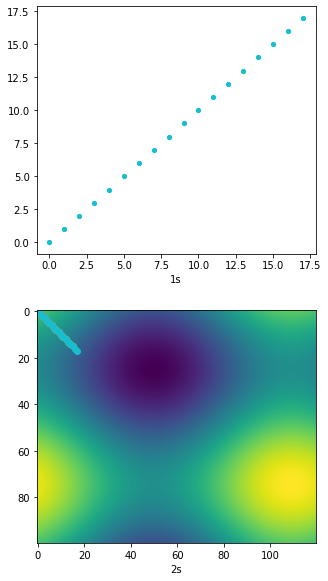

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
fig, axes = plt.subplots(2, 1, figsize=(5,10))
ims=[]

axes[0].set_xlabel('1s')
axes[1].set_xlabel('2s')
def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

for i in range(20):
    if i%2==0:
        im1 =axes[0].scatter(np.arange(i), np.arange(i), s=i)
    
        x += np.pi / 15.
        y += np.pi / 20.
        im2 = axes[1].imshow(f(x, y))
        im3 = axes[1].scatter(np.arange(i), np.arange(i))

        ims.append([im1, im2])

ani = animation.ArtistAnimation(fig, ims, interval=10)
ani.save('C:\\Users\\roberttk\\Desktop\\demo.gif', writer=PillowWriter(fps=4))

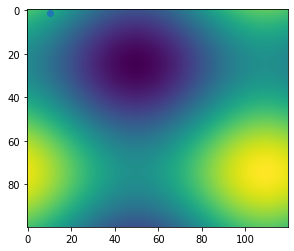

In [ ]:
plt.imshow(f(x,y))
plt.scatter([10], [1])